In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import randint

In [21]:
#Preparation
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

In [22]:
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [23]:
#Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

In [24]:
#Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

In [25]:
#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [26]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB

In [27]:
#Stacking
import mlxtend

In [28]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [29]:
from mlxtend.classifier import  StackingClassifier

In [30]:
train_df=pd.read_csv('survey.csv')
print(train_df.shape)
print(train_df.describe())
print(train_df.info())

(1259, 27)
                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-n

In [32]:
#Data Cleaning
total=train_df.isnull().sum().sort_values(ascending=False)
percent=(train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['total','Percent'])
missing_data.head(20)
print(missing_data)

                           total   Percent
comments                    1095  0.869738
state                        515  0.409055
work_interfere               264  0.209690
self_employed                 18  0.014297
seek_help                      0  0.000000
obs_consequence                0  0.000000
mental_vs_physical             0  0.000000
phys_health_interview          0  0.000000
mental_health_interview        0  0.000000
supervisor                     0  0.000000
coworkers                      0  0.000000
phys_health_consequence        0  0.000000
mental_health_consequence      0  0.000000
leave                          0  0.000000
anonymity                      0  0.000000
Timestamp                      0  0.000000
wellness_program               0  0.000000
Age                            0  0.000000
benefits                       0  0.000000
tech_company                   0  0.000000
remote_work                    0  0.000000
no_employees                   0  0.000000
treatment  

In [33]:
#dealing with missing data
train_df.drop(['comments'], axis= 1, inplace=True)
train_df.drop(['state'], axis= 1, inplace=True)
train_df.drop(['Timestamp'], axis= 1, inplace=True)
train_df.isnull().sum().max() #just checking that there's no missing data missing...
train_df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [35]:
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0
# Create lists by data tpe
intFeatures = ['Age']
stringFeatures=[]
floatFeatures = []
# Clean the NaN's
for feature in train_df:
    if feature in intFeatures:
        train_df[feature] = train_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        train_df[feature] = train_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        train_df[feature] = train_df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not identified.' % feature)
train_df.head()

Error: Feature Gender not identified.
Error: Feature Country not identified.
Error: Feature self_employed not identified.
Error: Feature family_history not identified.
Error: Feature treatment not identified.
Error: Feature work_interfere not identified.
Error: Feature no_employees not identified.
Error: Feature remote_work not identified.
Error: Feature tech_company not identified.
Error: Feature benefits not identified.
Error: Feature care_options not identified.
Error: Feature wellness_program not identified.
Error: Feature seek_help not identified.
Error: Feature anonymity not identified.
Error: Feature leave not identified.
Error: Feature mental_health_consequence not identified.
Error: Feature phys_health_consequence not identified.
Error: Feature coworkers not identified.
Error: Feature supervisor not identified.
Error: Feature mental_health_interview not identified.
Error: Feature phys_health_interview not identified.
Error: Feature mental_vs_physical not identified.
Error: Fea

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [36]:
#Clean 'Gender'
gender = train_df['Gender'].unique()
print(gender)

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [37]:
#Get rid of bullshit
stk_list = ['A little about you', 'p']
train_df = train_df[~train_df['Gender'].isin(stk_list)]
print(train_df['Gender'].unique())

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'Malr' 'femail' 'Cis Man'
 'ostensibly male, unsure what that really means']


In [38]:
#complete missing age with mean
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)
# Fill with media() values  120
s = pd.Series(train_df['Age'])
s[s<18] = train_df['Age'].median()
train_df['Age'] = s
s = pd.Series(train_df['Age'])
s[s>120] = train_df['Age'].median()
train_df['Age'] = s
#Ranges of Age
train_df['age_range'] = pd.cut(train_df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)
#There are only 0.014% of self employed so let's change NaN to NOT self_employed
#Replace "NaN" string from defaultString
train_df['self_employed'] = train_df['self_employed'].replace([defaultString], 'No')
print(train_df['self_employed'].unique())

[nan 'Yes' 'No']


In [45]:
#There are only 0.20% of self work_interfere so let's change NaN to "Don't know
#Replace "NaN" string from defaultString
train_df['work_interfere'] = train_df['work_interfere'].replace([defaultString], "Don't know" )
print(train_df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' nan]


In [46]:
#Encoding data
labelDict = {}
for feature in train_df:
    le = preprocessing.LabelEncoder()
    le.fit(train_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train_df[feature] = le.transform(train_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
for key, value in labelDict.items():
    print(key, value)

label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['Agender', 'All', 'Androgyne', 'Cis Female', 'Cis Male', 'Cis Man', 'Enby', 'F', 'Femake', 'Female', 'Female ', 'Female (cis)', 'Female (trans)', 'Genderqueer', 'Guy (-ish) ^_^', 'M', 'Mail', 'Make', 'Mal', 'Male', 'Male ', 'Male (CIS)', 'Male-ish', 'Malr', 'Man', 'Nah', 'Neuter', 'Trans woman', 'Trans-female', 'Woman', 'cis male', 'cis-female/femme', 'f', 'femail', 'female', 'fluid', 'm', 'maile', 'male', 'male leaning androgynous', 'msle', 'non-binary', 'ostensibly male, unsure what that really means', 'queer', 'queer/she/they', 'something kinda male?', 'woman']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany'

In [47]:
#Get rid of 'Country'
train_df = train_df.drop(['Country'], axis= 1)
train_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,19,9,2,0,1,1,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,26,15,2,0,0,2,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,14,19,2,0,0,2,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,13,19,2,1,1,1,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,13,19,2,0,0,0,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


In [48]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total  Percent
Age                            0      0.0
Gender                         0      0.0
obs_consequence                0      0.0
mental_vs_physical             0      0.0
phys_health_interview          0      0.0
mental_health_interview        0      0.0
supervisor                     0      0.0
coworkers                      0      0.0
phys_health_consequence        0      0.0
mental_health_consequence      0      0.0
leave                          0      0.0
anonymity                      0      0.0
seek_help                      0      0.0
wellness_program               0      0.0
care_options                   0      0.0
benefits                       0      0.0
tech_company                   0      0.0
remote_work                    0      0.0
no_employees                   0      0.0
work_interfere                 0      0.0
treatment                      0      0.0
family_history                 0      0.0
self_employed                  0  

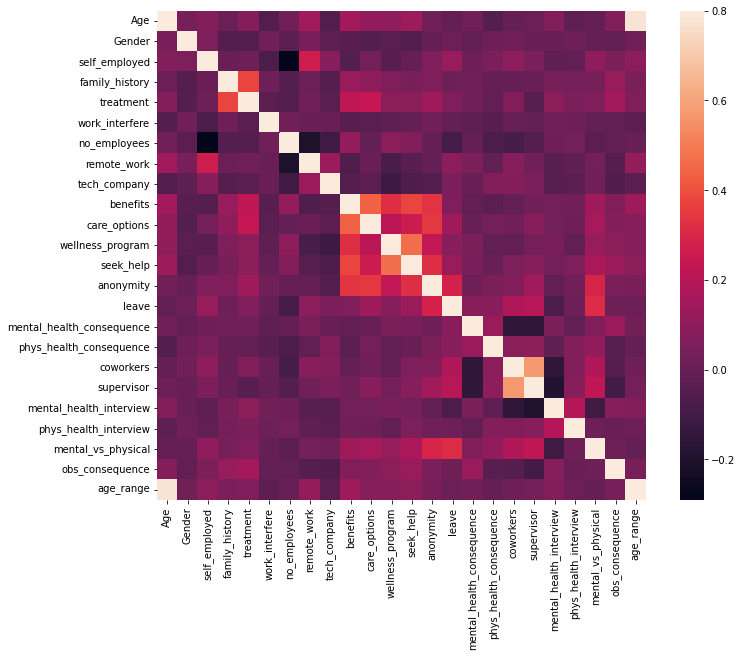

In [49]:
#Covariance Matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

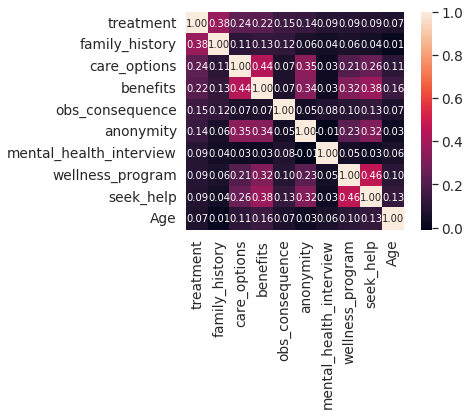

In [50]:
k = 10 
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Age')

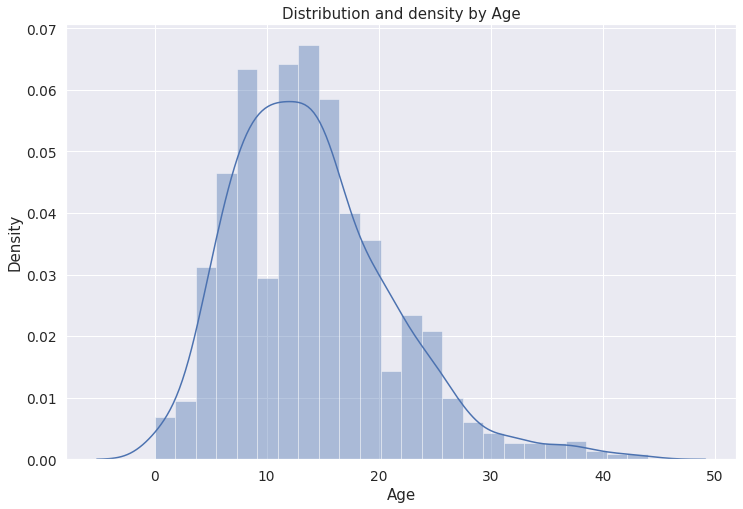

In [51]:
#Some Charts to see the Data Relationship
# Distribution and density by Age
plt.figure(figsize=(12,8))
sns.distplot(train_df["Age"], bins=24)
plt.title("Distribution and density by Age")
plt.xlabel("Age")


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


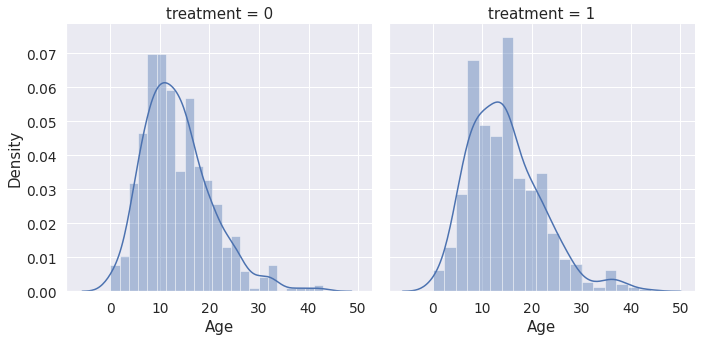

In [52]:
j = sns.FacetGrid(train_df, col='treatment', size=5)
j = j.map(sns.distplot, "Age")
#Treatment 0 means treatment is not necessary 1 means it is.

Text(0.5, 1.0, 'Total Distribution by treated or not')

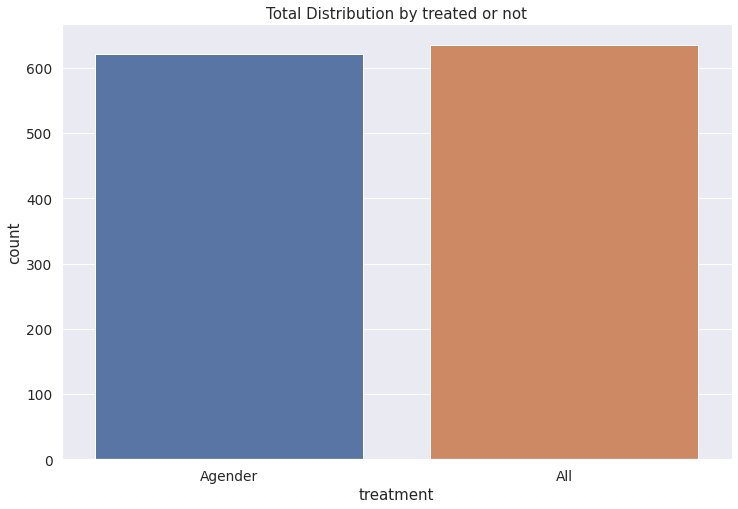

In [53]:
plt.figure(figsize=(12,8))
labels = labelDict['label_Gender']
j = sns.countplot(x="treatment", data=train_df)
j.set_xticklabels(labels)
plt.title('Total Distribution by treated or not')

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


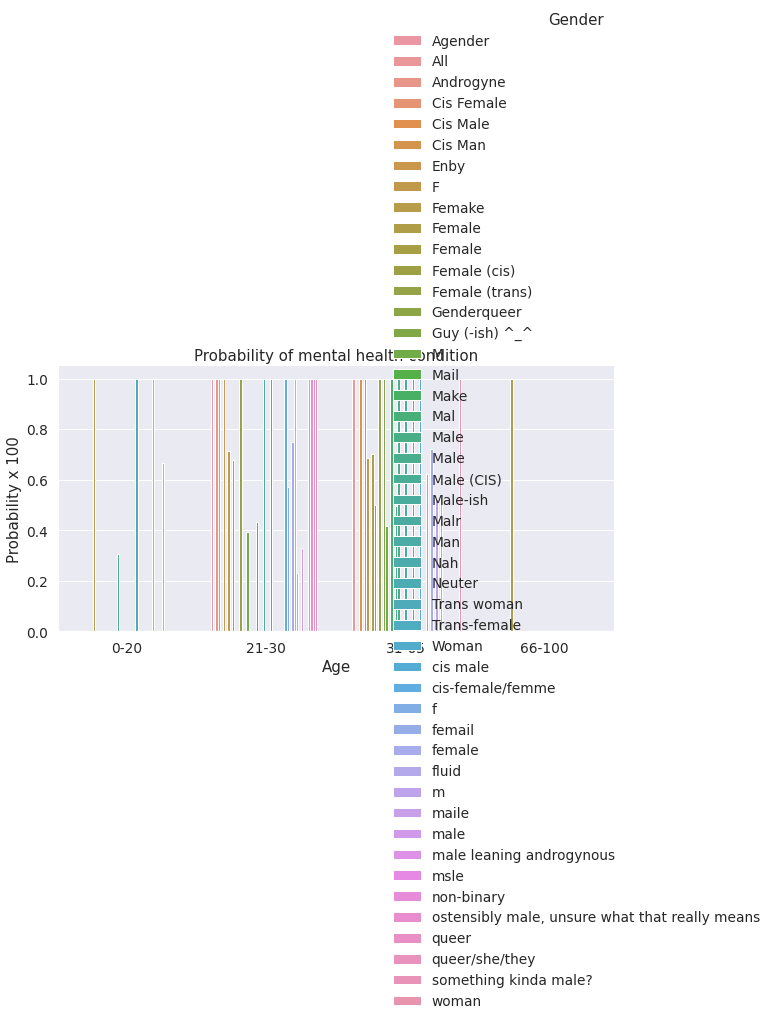

In [54]:
o = labelDict['label_age_range']
j = sns.factorplot(x="age_range", y="treatment", hue="Gender", data=train_df, kind="bar",  ci=None, size=5, aspect=2, legend_out = True)
j.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Age')
new_labels = labelDict['label_Gender']
for t, l in zip(j._legend.texts, new_labels): t.set_text(l)
j.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


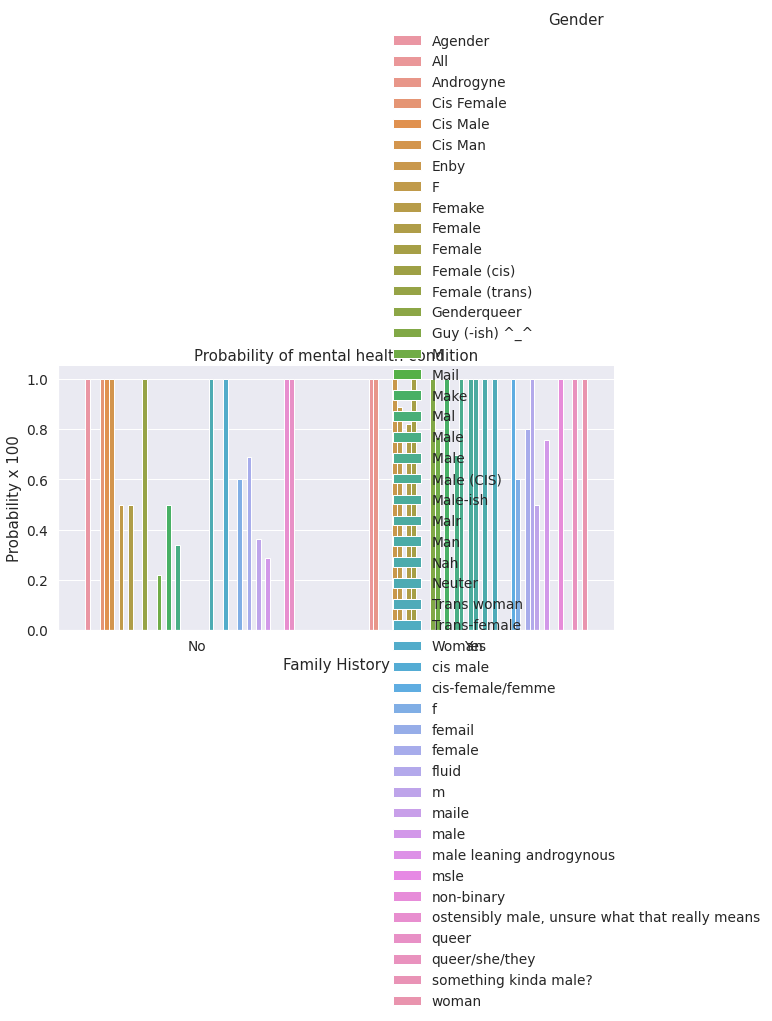

In [56]:
o = labelDict['label_family_history']
j = sns.factorplot(x="family_history", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, size=5, aspect=2, legend_out = True)
j.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Family History')
new_labels = labelDict['label_Gender']
for t, l in zip(j._legend.texts, new_labels): t.set_text(l)
j.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


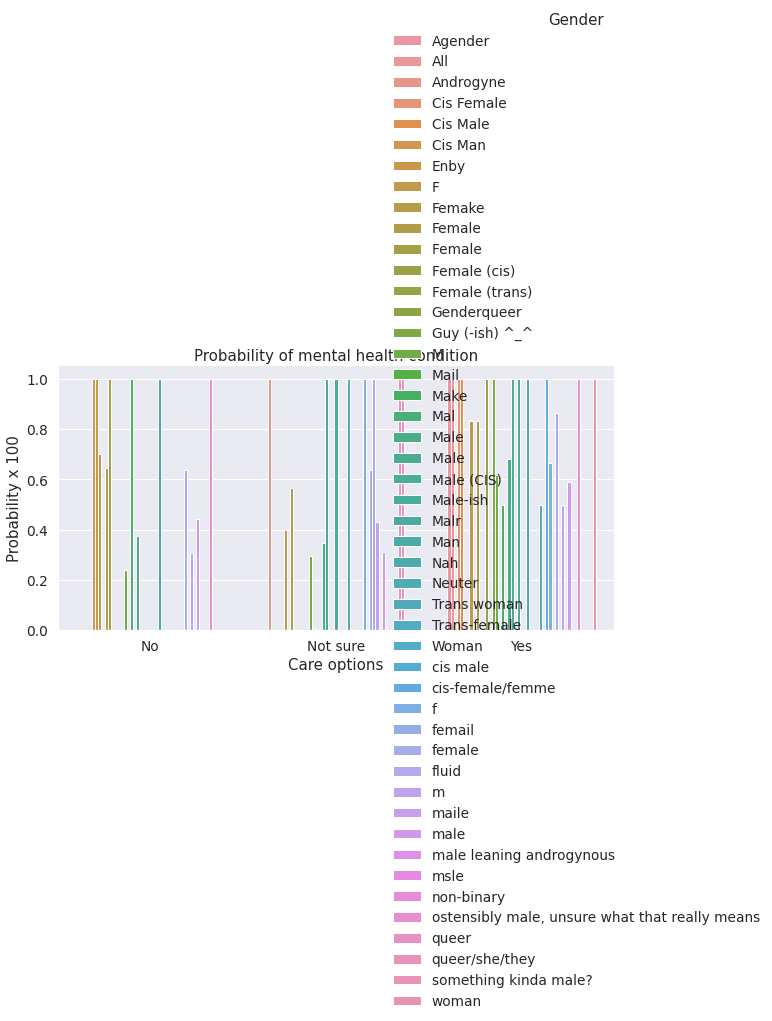

In [58]:
o = labelDict['label_care_options']
j = sns.factorplot(x="care_options", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, size=5, aspect=2, legend_out = True)
j.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Care options')
new_labels = labelDict['label_Gender']
for t, l in zip(j._legend.texts, new_labels): t.set_text(l)
j.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


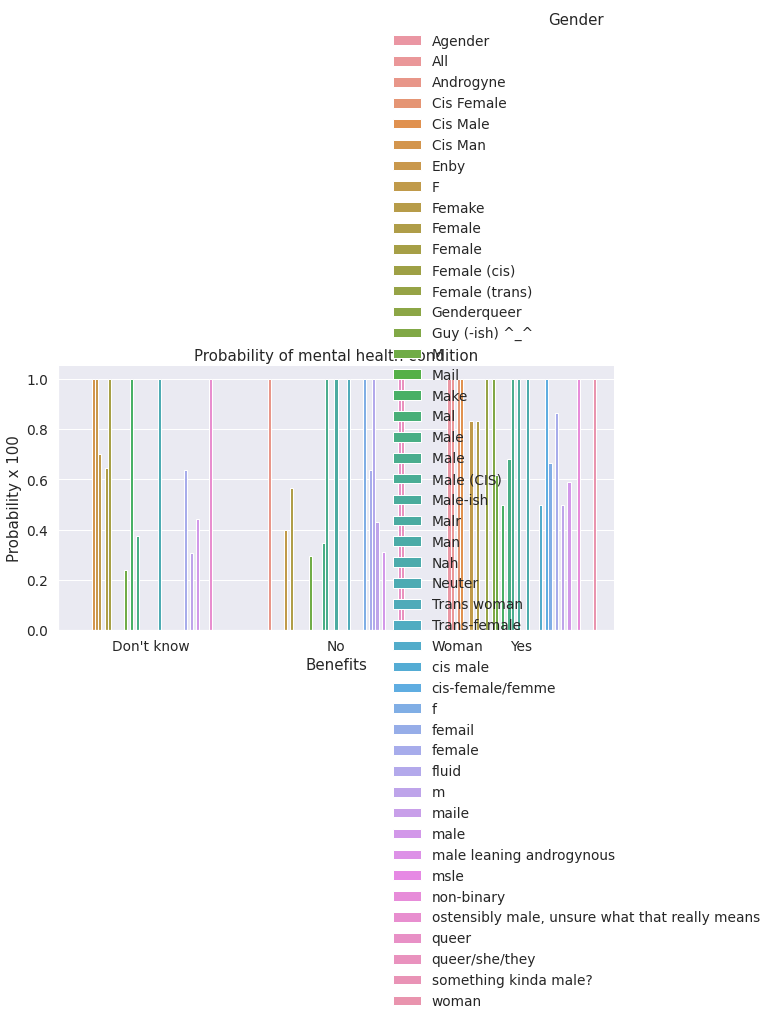

In [59]:
o = labelDict['label_benefits']
j = sns.factorplot(x="care_options", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, size=5, aspect=2, legend_out = True)
j.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Benefits')
new_labels = labelDict['label_Gender']
for t, l in zip(j._legend.texts, new_labels): t.set_text(l)
j.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


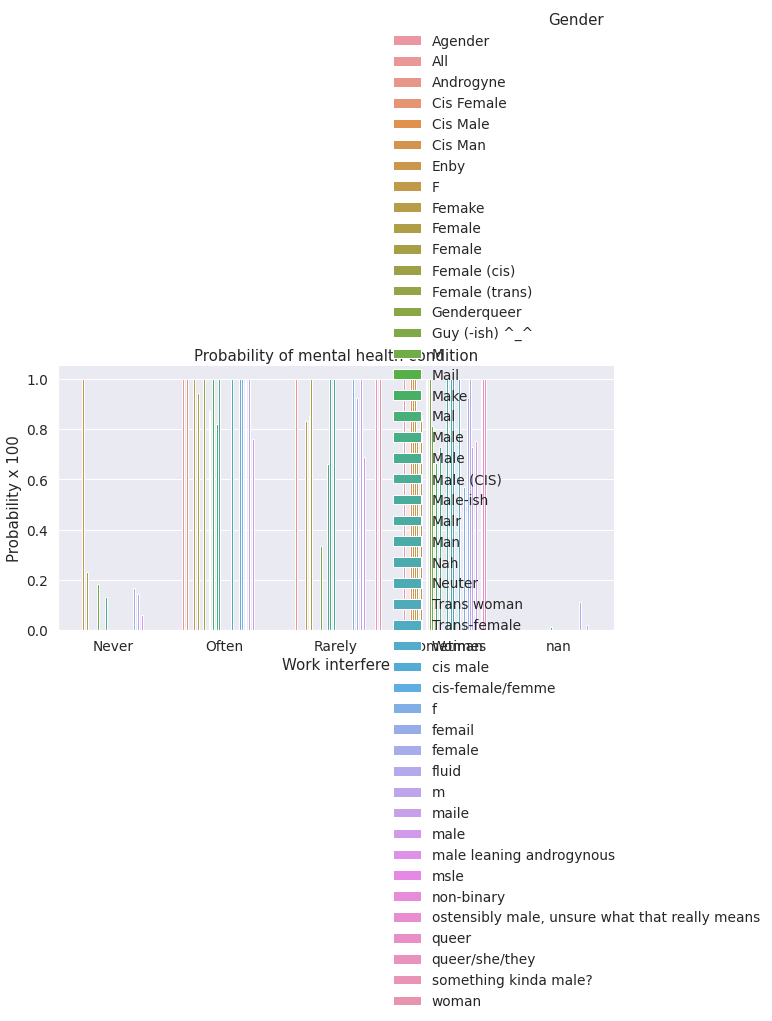

In [61]:
o = labelDict['label_work_interfere']
j = sns.factorplot(x="work_interfere", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, size=5, aspect=2, legend_out = True)
j.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Work interfere')
new_labels = labelDict['label_Gender']
for t, l in zip(j._legend.texts, new_labels): t.set_text(l)
j.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

In [62]:
#Scaling and Fitting
# Scaling Age
scaler = MinMaxScaler()
train_df['Age'] = scaler.fit_transform(train_df[['Age']])
train_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.431818,9,2,0,1,1,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,0.590909,15,2,0,0,2,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,0.318182,19,2,0,0,2,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,0.295455,19,2,1,1,1,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,0.295455,19,2,0,0,0,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


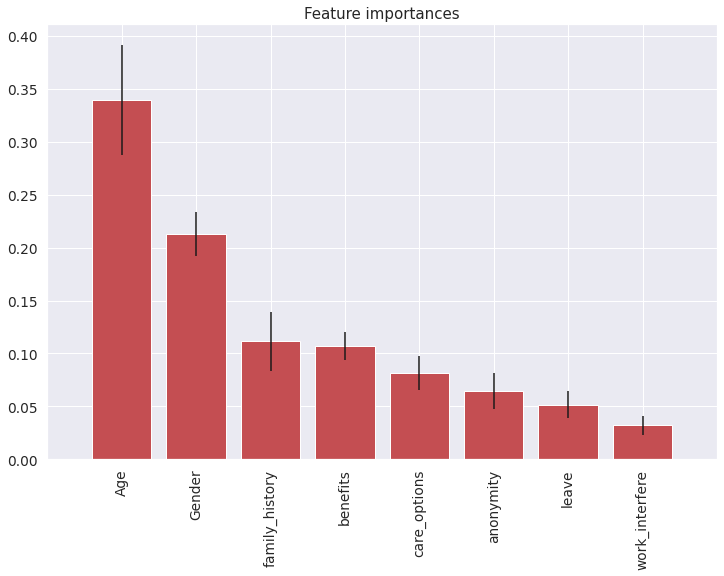

In [71]:
# define X and y
feature_cols1 = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = train_df[feature_cols1]
y = train_df.treatment
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.30)
# Create dictionaries for final graph
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = ()
forest = ExtraTreesClassifier(n_estimators=250)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols1[f])
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

In [107]:
#Tuning
def evalClassModel(model, y_test1, y_pred_class, plot=False):
    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    print('Accuracy:', metrics.accuracy_score(y_test1, y_pred_class))
    print('Null accuracy:n', y_test1.value_counts())
    # calculate the percentage of ones
    print('Percentage of ones:', y_test1.mean())
    # calculate the percentage of zeros
    print('Percentage of zeros:',1 - y_test1.mean())
    print('True:', y_test1.values[0:25])
    print('Pred:', y_pred_class[0:25])
    #Confusion matrix
    confusion = metrics.confusion_matrix(y_test1, y_pred_class)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    accuracy = metrics.accuracy_score(y_test1, y_pred_class)
    print('Classification Accuracy:', accuracy)
    print('Classification Error:', 1 - metrics.accuracy_score(y_test1, y_pred_class))
    fp_rate = FP / float(TN + FP)
    print('False Positive Rate:', fp_rate)
    print('Precision:', metrics.precision_score(y_test1, y_pred_class))
    print('AUC Score:', metrics.roc_auc_score(y_test1, y_pred_class))
    # calculate cross-validated AUC
    print('Crossvalidated AUC values:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())
    print('First 10 predicted responses:n', model.predict(X_test1)[0:10])
    print('First 10 predicted probabilities of class members:n', model.predict_proba(X_test1)[0:10])
    model.predict_proba(X_test1)[0:10, 1]
    y_pred_prob = model.predict_proba(X_test1)[:, 1]
    if plot == True:
        # histogram of predicted probabilities
        plt.rcParams['font.size'] = 12
        plt.hist(y_pred_prob, bins=8)
      
        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')
    y_pred_prob = y_pred_prob.reshape(-1,1)
    y_pred_class = binarize(y_pred_prob)
    print('First 10 predicted probabilities:n', y_pred_prob[0:10])
    roc_auc = metrics.roc_auc_score(y_test1, y_pred_prob)
    fpr, tpr, thresholds = metrics.roc_curve(y_test1, y_pred_prob)
    if plot == True:
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()
    def evaluate_threshold(threshold):
       
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test1, predict_mine)
    print(confusion)
    return accuracy

In [108]:
def tuningCV(knn):
    k_Range = list(range(1, 31))
    k_scores = []
    for k in k_Range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())
    print(k_scores)
    plt.plot(k_Range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

In [109]:
def tuningGridSerach(knn):
    
    k_Range = list(range(1, 31))
    print(k_Range)
   
    param_grid = dict(n_neighbors=k_Range)
    print(param_grid)
   
    grid =GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
    
    grid.fit(X, y)
    grid.grid_scores1_
    
    print(grid.grid_scores_[0].parameters)
    print(grid.grid_scores_[0].cv_validation_scores)
    print(grid.grid_scores_[0].mean_validation_score)
    grid_mean_scores1 = [result.mean_validation_score for result in grid.grid_scores_]
    print(grid_mean_scores1)
    # plot the results
    plt.plot(k_Range, grid_mean_scores1)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()
    # examine the best model
    print('GridSearch best score', grid.best_score_)
    print('GridSearch best params', grid.best_params_)
    print('GridSearch best estimator', grid.best_estimator_)

In [118]:
def tuningRandomizedSearchCV(model, param_dist):
   
    rand1 = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand1.fit(X, y)
    rand1.cv_results_
   
    print('Rand1. Best Score: ', rand1.best_score_)
    print('Rand1. Best Params: ', rand1.best_params_)
   
    best_scores = []
    for _ in range(20):
        rand1 = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand1.fit(X, y)
        best_scores.append(round(rand1.best_score_, 3))
    print(best_scores)

In [119]:
def tuningMultParam(knn):
    
    k_Range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
    
    param_grid = dict(N_neighbors=k_Range, weights=weight_options)
    print(param_grid)
    
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
    grid.fit(X, y)
   
    print(grid.grid_scores_)
   
    print('Multiparam. Best Score: ', grid.best_score_)
    print('Multiparam. Best Params: ', grid.best_params_)

In [120]:
#Evaluating Models
def logisticRegression():
    logreg = LogisticRegression()
    logreg.fit(X_train1, y_train1)
    y_pred_class = logreg.predict(X_test1)
    accuracy_score = evalClassModel(logreg, y_test1, y_pred_class, True)
    #Data for final graph
    methodDict['Log. Regression'] = accuracy_score * 100

Accuracy: 0.6507936507936508
Null accuracy:n 1    197
0    181
Name: treatment, dtype: int64
Percentage of ones: 0.5211640211640212
Percentage of zeros: 0.47883597883597884
True: [0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0]
Pred: [0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0]


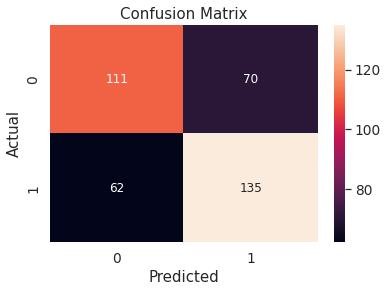

Classification Accuracy: 0.6507936507936508
Classification Error: 0.3492063492063492
False Positive Rate: 0.3867403314917127
Precision: 0.6585365853658537
AUC Score: 0.6492694281627731
Crossvalidated AUC values: 0.7484166065993303
First 10 predicted responses:n [0 0 0 1 0 0 1 1 0 1]
First 10 predicted probabilities of class members:n [[0.83537214 0.16462786]
 [0.56882292 0.43117708]
 [0.78437573 0.21562427]
 [0.11719983 0.88280017]
 [0.74254847 0.25745153]
 [0.60811854 0.39188146]
 [0.39801451 0.60198549]
 [0.3233947  0.6766053 ]
 [0.50846436 0.49153564]
 [0.12664179 0.87335821]]
First 10 predicted probabilities:n [[0.16462786]
 [0.43117708]
 [0.21562427]
 [0.88280017]
 [0.25745153]
 [0.39188146]
 [0.60198549]
 [0.6766053 ]
 [0.49153564]
 [0.87335821]]


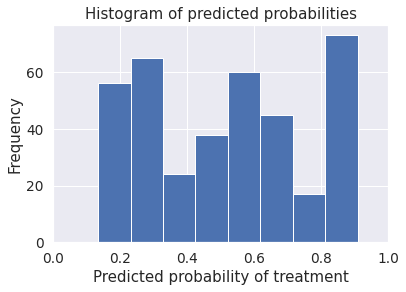

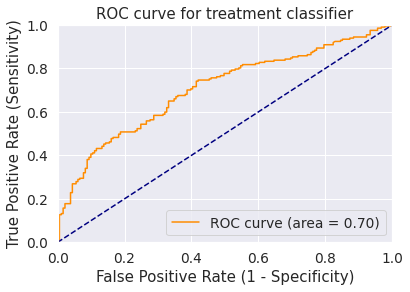

[[111  70]
 [ 62 135]]


In [121]:
logisticRegression()

In [127]:
#KNeighbors Classifier
def Knn():
    # Calculating the best parameters
    knn = KNeighborsClassifier(n_neighbors=5)
   
    k_Range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
    
    param_dist = dict(n_neighbors=k_Range, weights=weight_options)
    tuningRandomizedSearchCV(knn, param_dist)
   
    knn = KNeighborsClassifier(n_neighbors=27, weights='uniform')
    knn.fit(X_train1, y_train1)
   
    y_pred_class = knn.predict(X_test1)
    accuracy_score = evalClassModel(knn, y_test1, y_pred_class, True)
    #Data for final graph
    methodDict['K-Neighbors'] = accuracy_score * 100

Rand1. Best Score:  0.7445587301587302
Rand1. Best Params:  {'weights': 'distance', 'n_neighbors': 10}
[0.744, 0.744, 0.742, 0.742, 0.745, 0.744, 0.745, 0.741, 0.744, 0.742, 0.742, 0.745, 0.745, 0.745, 0.744, 0.743, 0.745, 0.745, 0.745, 0.744]
Accuracy: 0.6798941798941799
Null accuracy:n 1    197
0    181
Name: treatment, dtype: int64
Percentage of ones: 0.5211640211640212
Percentage of zeros: 0.47883597883597884
True: [0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0]
Pred: [0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0]


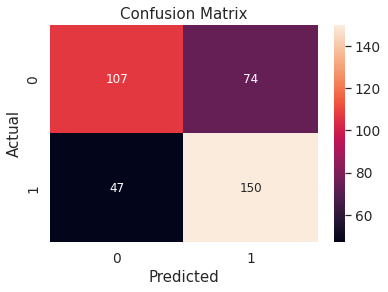

Classification Accuracy: 0.6798941798941799
Classification Error: 0.3201058201058201
False Positive Rate: 0.4088397790055249
Precision: 0.6696428571428571
AUC Score: 0.6762907703957146
Crossvalidated AUC values: 0.7966405564241825
First 10 predicted responses:n [0 1 1 1 1 1 1 1 0 1]
First 10 predicted probabilities of class members:n [[0.77777778 0.22222222]
 [0.22222222 0.77777778]
 [0.37037037 0.62962963]
 [0.33333333 0.66666667]
 [0.40740741 0.59259259]
 [0.48148148 0.51851852]
 [0.2962963  0.7037037 ]
 [0.37037037 0.62962963]
 [0.74074074 0.25925926]
 [0.07407407 0.92592593]]
First 10 predicted probabilities:n [[0.22222222]
 [0.77777778]
 [0.62962963]
 [0.66666667]
 [0.59259259]
 [0.51851852]
 [0.7037037 ]
 [0.62962963]
 [0.25925926]
 [0.92592593]]


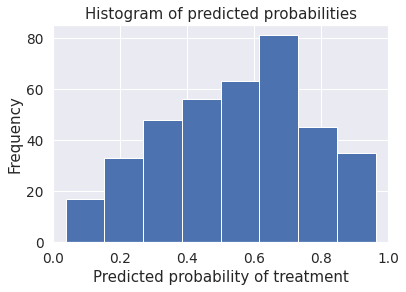

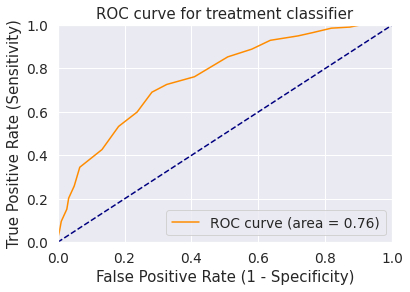

[[107  74]
 [ 47 150]]


In [128]:
Knn()

In [131]:
#Decision Tree
def treeClassifier():
    # Calculating the best parameters
    tree1 = DecisionTreeClassifier()
    featuresSize = feature_cols1.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(tree1, param_dist)
    tree1 = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
    tree1.fit(X_train1, y_train1)
    y_pred_class = tree1.predict(X_test1)
    accuracy_score = evalClassModel(tree1, y_test1, y_pred_class, True)
    #Data for final graph
    methodDict['Decision Tree Classifier'] = accuracy_score * 100

Rand1. Best Score:  0.8313142857142857
Rand1. Best Params:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 6}
[0.827, 0.831, 0.824, 0.831, 0.831, 0.826, 0.792, 0.831, 0.823, 0.831, 0.825, 0.831, 0.8, 0.831, 0.831, 0.806, 0.8, 0.831, 0.83, 0.829]
Accuracy: 0.8174603174603174
Null accuracy:n 1    197
0    181
Name: treatment, dtype: int64
Percentage of ones: 0.5211640211640212
Percentage of zeros: 0.47883597883597884
True: [0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0]
Pred: [0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0]


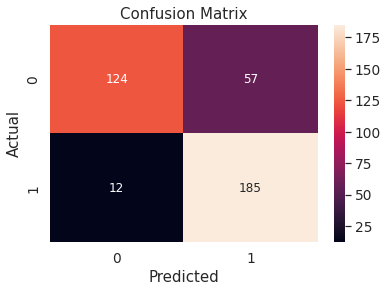

Classification Accuracy: 0.8174603174603174
Classification Error: 0.18253968253968256
False Positive Rate: 0.3149171270718232
Precision: 0.7644628099173554
AUC Score: 0.8120845836722103
Crossvalidated AUC values: 0.8616445389012833
First 10 predicted responses:n [0 1 1 1 1 1 1 1 0 1]
First 10 predicted probabilities of class members:n [[0.896      0.104     ]
 [0.3229572  0.6770428 ]
 [0.3229572  0.6770428 ]
 [0.13879004 0.86120996]
 [0.3229572  0.6770428 ]
 [0.3229572  0.6770428 ]
 [0.13879004 0.86120996]
 [0.13879004 0.86120996]
 [0.896      0.104     ]
 [0.13879004 0.86120996]]
First 10 predicted probabilities:n [[0.104     ]
 [0.6770428 ]
 [0.6770428 ]
 [0.86120996]
 [0.6770428 ]
 [0.6770428 ]
 [0.86120996]
 [0.86120996]
 [0.104     ]
 [0.86120996]]


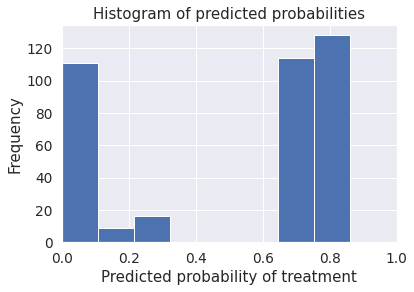

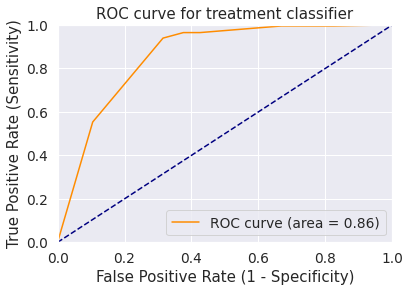

[[124  57]
 [ 12 185]]


In [132]:
treeClassifier()

In [134]:
#Random Forest
def randomForest():
    # Calculating the best parameters
    forest1 = RandomForestClassifier(n_estimators = 20)
    featuresSize = feature_cols1.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(forest1, param_dist)
    forest1 = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)
    my_forest = forest.fit(X_train1, y_train1)
    y_pred_class = my_forest.predict(X_test1)
    accuracy_score = evalClassModel(my_forest, y_test1, y_pred_class, True)
    #Data for final graph
    methodDict['Random Forest'] = accuracy_score * 100

Rand1. Best Score:  0.8305523809523809
Rand1. Best Params:  {'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 8, 'min_samples_split': 2}
[0.831, 0.831, 0.831, 0.831, 0.831, 0.831, 0.831, 0.831, 0.831, 0.822, 0.831, 0.83, 0.831, 0.831, 0.832, 0.831, 0.827, 0.831, 0.831, 0.831]
Accuracy: 0.7671957671957672
Null accuracy:n 1    197
0    181
Name: treatment, dtype: int64
Percentage of ones: 0.5211640211640212
Percentage of zeros: 0.47883597883597884
True: [0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0]
Pred: [0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0]


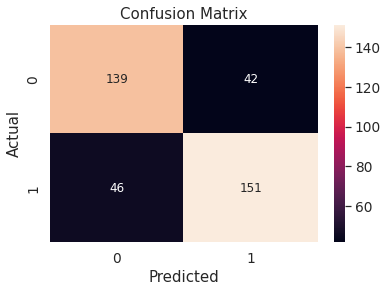

Classification Accuracy: 0.7671957671957672
Classification Error: 0.2328042328042328
False Positive Rate: 0.23204419889502761
Precision: 0.7823834196891192
AUC Score: 0.7672266315169531
Crossvalidated AUC values: 0.8489079809044286
First 10 predicted responses:n [0 0 1 1 0 1 1 1 0 1]
First 10 predicted probabilities of class members:n [[1.    0.   ]
 [0.596 0.404]
 [0.416 0.584]
 [0.032 0.968]
 [0.556 0.444]
 [0.488 0.512]
 [0.016 0.984]
 [0.152 0.848]
 [0.926 0.074]
 [0.032 0.968]]
First 10 predicted probabilities:n [[0.   ]
 [0.404]
 [0.584]
 [0.968]
 [0.444]
 [0.512]
 [0.984]
 [0.848]
 [0.074]
 [0.968]]


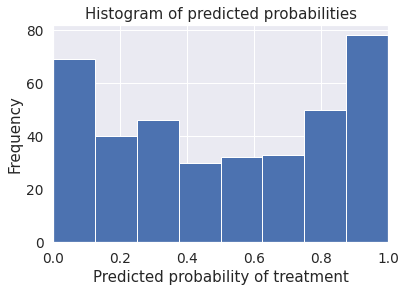

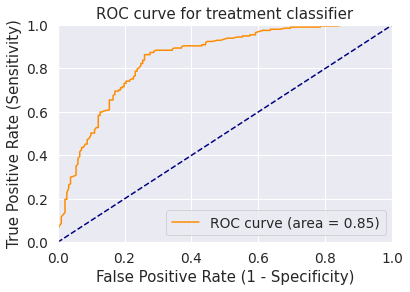

[[139  42]
 [ 46 151]]


In [135]:
randomForest()

In [136]:
#Boosting
def boosting():
    # Building and fitting
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
    boost = AdaBoostClassifier(base_estimator=clf, n_estimators=500)
    boost.fit(X_train1, y_train1)
    y_pred_class = boost.predict(X_test1)
    accuracy_score = evalClassModel(boost, y_test1, y_pred_class, True)
    #Data for final graph
    methodDict['Boosting'] = accuracy_score * 100

Accuracy: 0.8174603174603174
Null accuracy:n 1    197
0    181
Name: treatment, dtype: int64
Percentage of ones: 0.5211640211640212
Percentage of zeros: 0.47883597883597884
True: [0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0]
Pred: [0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0]


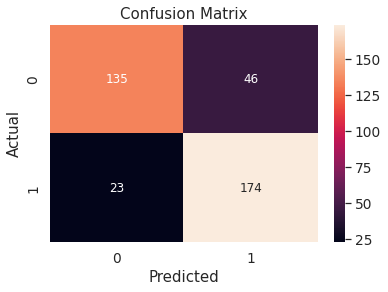

Classification Accuracy: 0.8174603174603174
Classification Error: 0.18253968253968256
False Positive Rate: 0.2541436464088398
Precision: 0.7909090909090909
AUC Score: 0.8145525422778136
Crossvalidated AUC values: 0.8743506981272198
First 10 predicted responses:n [0 0 0 1 0 1 1 1 0 1]
First 10 predicted probabilities of class members:n [[0.50162727 0.49837273]
 [0.5002194  0.4997806 ]
 [0.50054471 0.49945529]
 [0.49852651 0.50147349]
 [0.50008637 0.49991363]
 [0.49962089 0.50037911]
 [0.49857119 0.50142881]
 [0.49896918 0.50103082]
 [0.50120492 0.49879508]
 [0.49848757 0.50151243]]
First 10 predicted probabilities:n [[0.49837273]
 [0.4997806 ]
 [0.49945529]
 [0.50147349]
 [0.49991363]
 [0.50037911]
 [0.50142881]
 [0.50103082]
 [0.49879508]
 [0.50151243]]


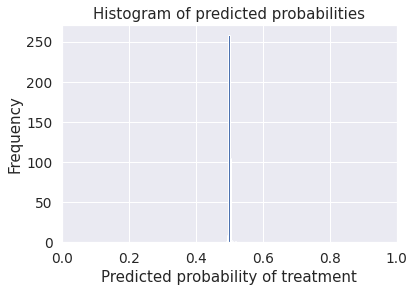

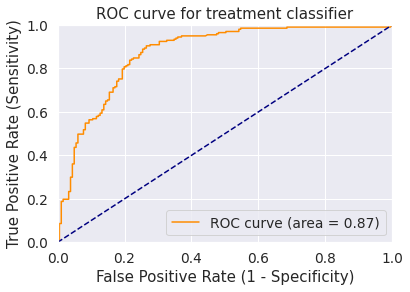

[[135  46]
 [ 23 174]]


In [137]:
boosting()